In [8]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
import nltk
from konlpy.tag import Mecab
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import random
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from tensorflow import keras
import matplotlib.pyplot as plt



mecab = Mecab(dicpath=r"C:\\mecab\\mecab-ko-dic")#토큰화 자료 

#불용어 자료
stopwords = pd.read_csv('S:\BD_ai_test\stopword_dict_ko\\stopwords-ko.txt')
stopwords = list(stopwords)

tokenizer = Tokenizer()

#토큰화 및 불용어 제거 함수
def text_preprocessing(text_list):
    token_list = []
    for text in text_list:
        token = mecab.morphs(text) #토큰화 적용
        token = [t for t in token if t not in stopwords] #불용어 제거
        token_list.append(token)
    return token_list

#각 데이터를 토큰화 및 불용어 제거 그리고 정수 인코딩 적용
dataframe1 = pd.read_csv('S:\BD_ai_test\dst_data\\train_test_val.csv')
preview_list = text_preprocessing(dataframe1['미리보기']) 
tokenizer.fit_on_texts(preview_list)
preview_list = pad_sequences(tokenizer.texts_to_sequences(preview_list), maxlen=21)

#데이터 벡터화
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    return results

"""for i in range(len(preview_list)):
    print(preview_list[i])"""

#각 데이터를 토큰화 및 불용어 제거 그리고 정수 인코딩 적용| 라벨은 18개로 구성되어 있음
dataframe2 = pd.read_csv('S:\BD_ai_test\dst_data\\train_test_val.csv')
label_list = text_preprocessing(dataframe2['분류'])
tokenizer.fit_on_texts(label_list)
label_lists = pad_sequences(tokenizer.texts_to_sequences(label_list))


#훈련데이터
train_preview = preview_list[0:1560]
train_label = label_lists[0:1560]

#검증데이터
val_preview = preview_list[1561:2100]
val_label = label_lists[1561:2100]

#테스트데이터
test_preview = preview_list[2101:]
test_label = label_lists[2101:]

#훈련데이터 라벨 원핫인코딩
num_classes = max(np.max(train_label), np.max(val_label), np.max(test_label)) + 1
train_label = to_categorical(train_label, num_classes=num_classes)
val_label = to_categorical(val_label, num_classes=num_classes)
test_label = to_categorical(test_label, num_classes=num_classes)

Epoch 1/35
7/7 [==============================] - 0s 17ms/step - loss: 360.4745 - accuracy: 0.0340 - val_loss: 252.3865 - val_accuracy: 0.0816
Epoch 2/35
7/7 [==============================] - 0s 6ms/step - loss: 224.9051 - accuracy: 0.0994 - val_loss: 189.6398 - val_accuracy: 0.1503
Epoch 3/35
7/7 [==============================] - 0s 6ms/step - loss: 174.5213 - accuracy: 0.1372 - val_loss: 157.8124 - val_accuracy: 0.1484
Epoch 4/35
7/7 [==============================] - 0s 5ms/step - loss: 142.4663 - accuracy: 0.1494 - val_loss: 135.2651 - val_accuracy: 0.1781
Epoch 5/35
7/7 [==============================] - 0s 5ms/step - loss: 118.0255 - accuracy: 0.1526 - val_loss: 118.0126 - val_accuracy: 0.2022
Epoch 6/35
7/7 [==============================] - 0s 5ms/step - loss: 100.3373 - accuracy: 0.1615 - val_loss: 102.4467 - val_accuracy: 0.1818
Epoch 7/35
7/7 [==============================] - 0s 6ms/step - loss: 84.1185 - accuracy: 0.1718 - val_loss: 91.2023 - val_accuracy: 0.1447
Epoch 8

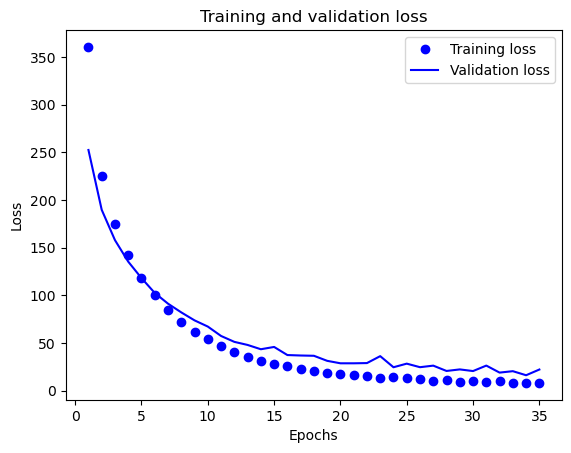

In [9]:
model = models.Sequential()
model.add(layers.Dense(21, activation='relu', input_shape=(21,)))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_preview, train_label, epochs=35, batch_size=256, validation_data=(val_preview, val_label))

results = model.evaluate(test_preview, test_label)

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') #bo는 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss') #b는 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [10]:
"""model = keras.models.load_model('S:\BD_ai_test\\model.h5')"""

new_data = pd.read_csv('test.csv')

# 데이터 전처리
new_data_preprocessed = text_preprocessing(new_data['미리보기'])
new_data_preprocessed = pad_sequences(tokenizer.texts_to_sequences(new_data_preprocessed), maxlen=21)

# 모델로 예측 수행
predictions = model.predict(new_data_preprocessed)

# 예측 결과 해석 후 글자로 변환
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes = predicted_classes.tolist()

# 인덱스를 단어로 바꾸기 위한 딕셔너리 생성
index_word = {v: k for k, v in tokenizer.word_index.items()}

# 예측된 클래스 인덱스를 실제 클래스 이름으로 변환
predicted_class_names = [index_word[i] for i in predicted_classes]

# 예측 결과를 저장하는데, 이때 예측 결과는 라벨이 아닌 라벨에 해당하는 텍스트로 저장
new_data['구분'] = predicted_class_names
new_data.to_csv('S:\BD_ai_test\\dst_data\\result.csv', index=False, encoding='utf-8-sig')

2/2 [==============================] - 0s 1ms/step
